# 31회 ADP 복원 

## 문제풀이 복원자 31회 시험 성적
- 머신러닝: 52점
- 통계분석: 35점
- 총합: 87점

In [1]:
import warnings, platform
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [3]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    plt.rc('font', family='Malgun Gothic')
    fm._rebuild()
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import datetime as dt

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.contingency_tables import cochrans_q

In [5]:
np.random.seed(1004)

# 기계학습 (60점)

## 1. 비만 예측 분석
- 데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv
- 데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.


    id: unique id for each row    
    Gender: sex - male or female    
    Age: age    
    Height: height    
    Weight: weight    
    family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
    FAVC: Frequent consumption of high caloric food - yes or no     
    FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
    NCP: Number of main meals - 1, 2, 3, 4     
    CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always    
    SMOKE: Do you smoke - yes o no    
    CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l    
    SCC: Calories consumption monitoring - yes or no   
    FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
    TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
    CALC: Consumption of alcohol - no, sometimes, frequently, always    
    MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
    BMI: Body mass index
    
    (종속변수)     
    NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

In [6]:
obesity = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv", index_col='Unnamed: 0')
obesity

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,4,male,27,1.800000,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
1,11,male,26,1.850000,105,yes,yes,always,3,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i,30.679328
2,14,male,41,1.800000,99,no,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i,30.555556
3,18,female,29,1.530000,78,no,yes,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,33.320518
4,20,female,23,1.650000,70,yes,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,25.711662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,"2,107",female,21,1.710730,131,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,public_transportation,obesity_type_iii,44.901475
1258,"2,108",female,22,1.748584,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.741923
1259,"2,109",female,23,1.752206,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.543817
1260,"2,110",female,24,1.739450,133,yes,yes,always,3,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,44.071535


### 1-1  EDA & 결측치 및 이상치를 판단하고 설명하라
- SCC 변수에 3개의 이상치가 있다. 칼로리 소비 모니터링 여부를 판단하는 이진 변수로 특정 값으로 치환하기 어렵고, 전체 데이터 개수에 비해 매우 적으므로 우선 데이터를 제거한 수 EDA를 진행한다.

In [7]:
na_cnt = obesity.isnull().sum()
na_cnt[na_cnt > 0]

SCC    3
dtype: int64

In [8]:
obesity = obesity[obesity['SCC'].notna()]

- 종속변수를 살펴보았다. Target Column인 NObeyesdad는 범주형 변수이며, 각 범주 내 개수는 비교적 고른 모습을 보인다.

In [9]:
target_col = 'NObeyesdad'

In [10]:
obesity[target_col].value_counts()

obesity_type_i        350
obesity_type_iii      323
obesity_type_ii       296
overweight_level_i    290
Name: NObeyesdad, dtype: int64

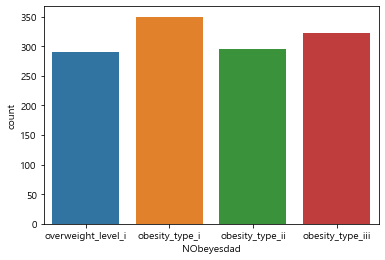

In [11]:
sns.countplot(obesity[target_col])
plt.show()

- 다음으로, 독립변수를 변수의 특성에 따라 구분하여 살펴보았다. 범주형은 barplot, 숫자형은 boxplot을 사용하여 도식화하였다.
- NCP 변수는 수치형 변수이지만, 정수로 구성된 데이터이므로 범주형 변수로 취급하였고, id 변수는 단순히 데이터를 구분하기 위한 숫자이므로 제외한다.

In [12]:
num_col = ['Age', 'Height', 'Weight', 'BMI']
cat_col = list(obesity.columns.difference([target_col, 'id'] + num_col))

- 범주형 변수를 먼저 살펴보면, 다수 변수에서 범주 간 데이터 불균형이 나타나는 적절한 처리가 필요해 보인다.
- 불균형이 있는 것으로 판단되는 변수에는 CAEC, CALC, FAF, FCVC, MRTANS, NCP, SCC, SMOKE, TUE, family_history_with_overweight이 있다.

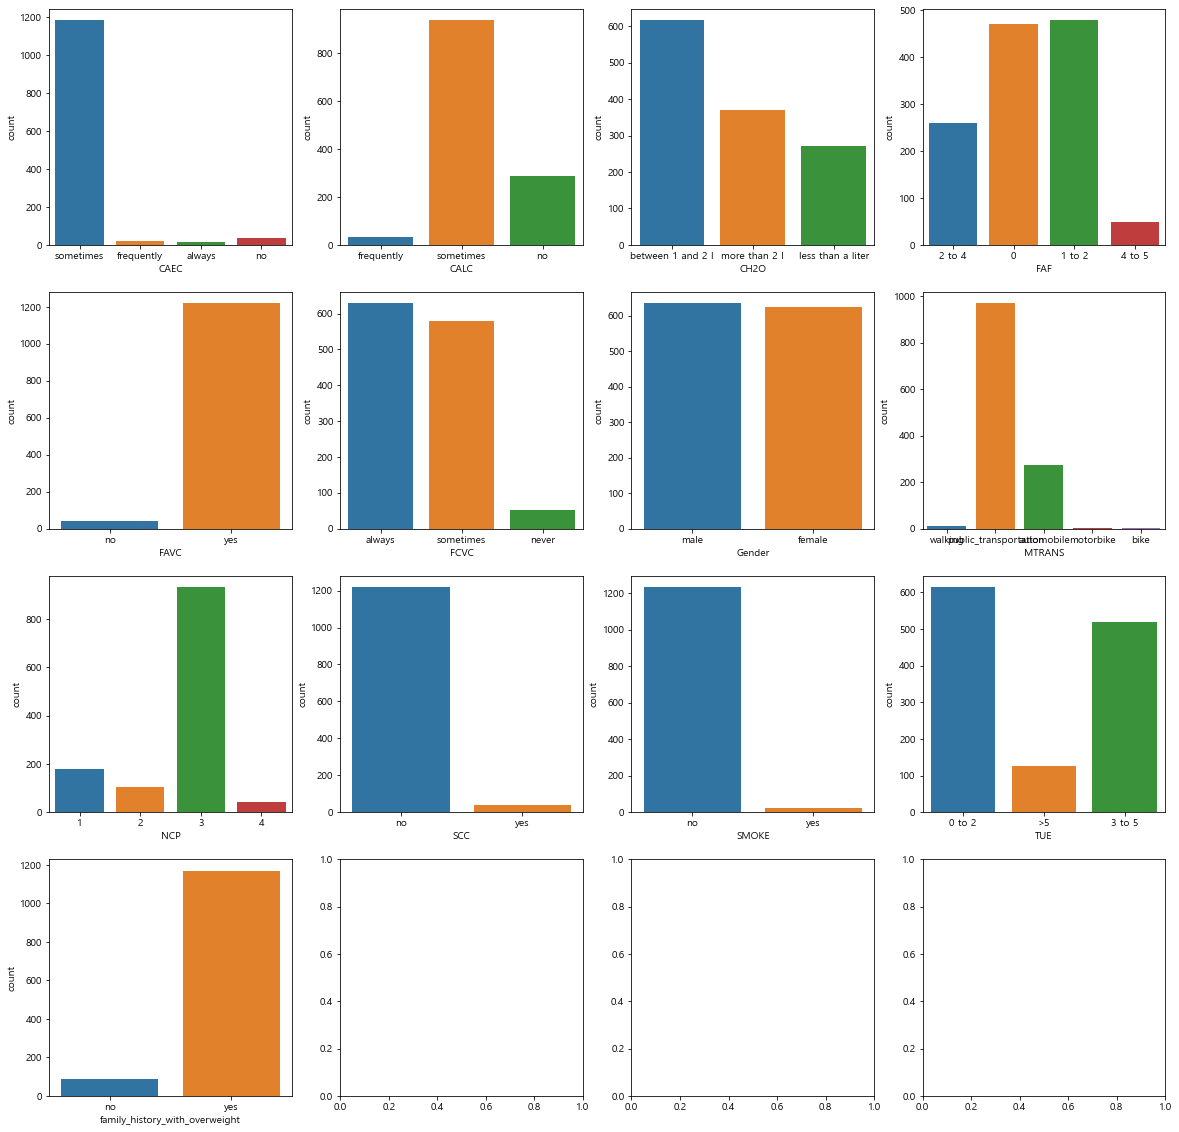

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i, col in enumerate(cat_col):
    ax_col = i%4
    ax_row = i//4
    sns.countplot(x=col, data=obesity, ax=axes[ax_row, ax_col])

- 수치형 변수의 분포를 보면, age 변수에서 140을 초과하는 이상치가 발견되었다. 이 데이터를 제거한 수 다시 시각화를 진행한다.

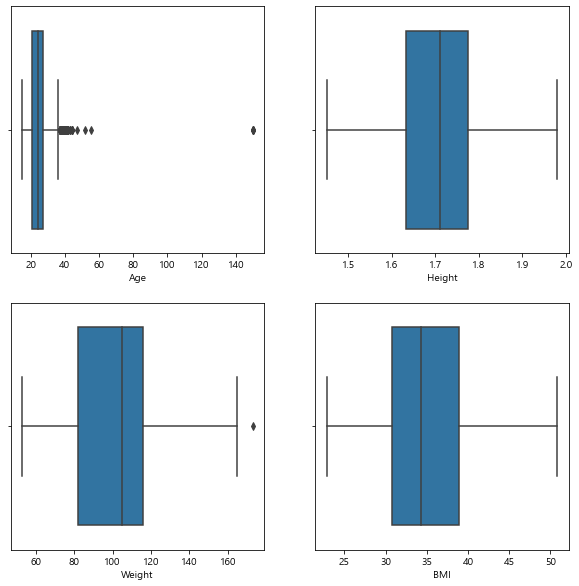

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, col in enumerate(num_col):
    ax_col = i%2
    ax_row = i//2
    sns.boxplot(x=col, data=obesity, ax=axes[ax_row, ax_col])

In [15]:
obesity = obesity[obesity['Age'] < 140] # 이상치 제거

- Height, Weight, BMI 변수는 비교적 skewness가 적은 것으로 보이며, Age 변수도 이상치를 제거한 후에는 skewness가 많이 감소했음을 확인할 수 있지만, 추가 변수 변환이 필요할 것으로 생각된다.
- Weight 변수에서 값이 매우 큰 데이터가 존재하나, 비만과 관련된 데이터의 특성 상 허용 가능할 것으로 보인다.

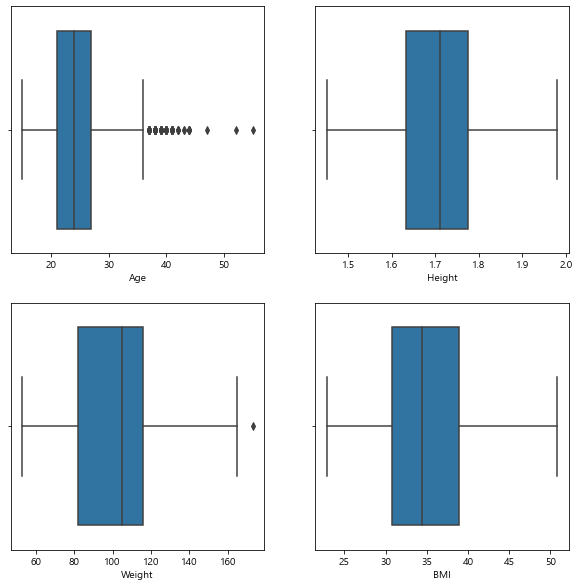

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, col in enumerate(num_col):
    ax_col = i%2
    ax_row = i//2
    sns.boxplot(x=col, data=obesity, ax=axes[ax_row, ax_col])

- 수치형 변수에 대해서는 상관관계 여부를 추가로 파악하였다. BMI와 Weight의 상관계수가 0.85, Height과 Weight의 상관계수가 0.57로 높게 나타났다.
- 몸무게는 키에 비례하고, BMI는 몸무게와 키의 관계를 가지고 산출하므로 자연스러운 결과로 생각된다.
- BMI와 Weight의 경우 다중 공선성이 우려되기는 하나 상관계수가 0.9를 넘지는 않으므로 함께 모델링을 진행한다.

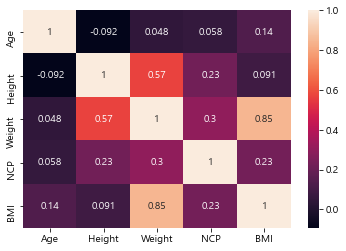

In [17]:
sns.heatmap(obesity.corr(method='spearman'), annot=True)
plt.show()

### 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라
- 본 시험에서는 카테고리 병합을 피쳐 엔지니어링으로 보았습니다. 하지만 카테고리 병합 또한 전처리로 보는 것이 더 적합하다고 판단되어 전처리 부분에 작성하였습니다.
- 앞서 파악된 범주형 변수의 불균형을 해소하기 위해 데이터 카테고리 병합을 진행하고, 머신러닝 모델이 이해할 수 있는 형태로 만들기 위해 encoding을 진행한다.
- 수치형 변수의 경우 모델 영향도 통일을 위해 scaling을 적용한다.
- 이를 통해 변수가 모델에 미치는 영향을 보다 더 명확하게 파악하고, 모델의 성능을 상승시킬 수 있다.
- 단, scaling의 경우 데이터 분할이 선행되어야 하므로, 1-3 파생변수 생성한 다음 서술한다.

- 카테고리 병합은 3개 카테고리 이상이 존재하는 범주형 변수인 CAEC, CALC, FCVC, FAF, MTRANS, NCP, TUE 변수에 적용하였고, 카테고리는 가능한 비슷한 카테고리가 묶일 수 있도록 하였다.
- 병합 대상 변수의 카테고리 분포를 살펴보면, 이전에 비해 불균형이 완화된 것을 볼 수 있다.

In [18]:
# 데이터 카테고리 병합
obesity['FCVC'] = np.where(obesity['FCVC']=='always', 'always', 'sometimes or never')

obesity['CAEC'] = np.where(obesity['CAEC']=='no', 'sometimes or less', obesity['CAEC'])
obesity['CAEC'] = np.where(obesity['CAEC']=='sometimes', 'sometimes or less', obesity['CAEC'])
obesity['CAEC'] = np.where(obesity['CAEC']=='frequently', 'sometimes or less', obesity['CAEC'])
obesity['CAEC'] = np.where(obesity['CAEC']=='always', 'frequently or more', obesity['CAEC'])

obesity['CALC'] = np.where(obesity['CALC']=='no', 'no', 'sometimes or more')

obesity['FAF'] = np.where(obesity['FAF']=='0', 'less than 2', obesity['FAF'])
obesity['FAF'] = np.where(obesity['FAF']=='1 to 2', 'less than 2', obesity['FAF'])
obesity['FAF'] = np.where(obesity['FAF']=='2 to 4', 'more than 2', obesity['FAF'])
obesity['FAF'] = np.where(obesity['FAF']=='4 to 5', 'more than 2', obesity['FAF'])

obesity['MTRANS'] = np.where(obesity['MTRANS']=='public_transportation', 'public_transportation or bike', obesity['MTRANS'])
obesity['MTRANS'] = np.where(obesity['MTRANS']=='walking', 'public_transportation or bike', obesity['MTRANS'])
obesity['MTRANS'] = np.where(obesity['MTRANS']=='bike', 'public_transportation or bike', obesity['MTRANS'])
obesity['MTRANS'] = np.where(obesity['MTRANS']=='automobile', 'automobile or motorbike', obesity['MTRANS'])
obesity['MTRANS'] = np.where(obesity['MTRANS']=='motorbike', 'automobile or motorbike', obesity['MTRANS'])

obesity['NCP'] = np.where(obesity['NCP']=='1', '1 to 2', obesity['NCP'])
obesity['NCP'] = np.where(obesity['NCP']=='2', '1 to 2', obesity['NCP'])
obesity['NCP'] = np.where(obesity['NCP']=='3', '3 to 4', obesity['NCP'])
obesity['NCP'] = np.where(obesity['NCP']=='4', '3 to 4', obesity['NCP'])

obesity['TUE'] = np.where(obesity['TUE']=='0 to 2', '0 to 2', '3 or above')

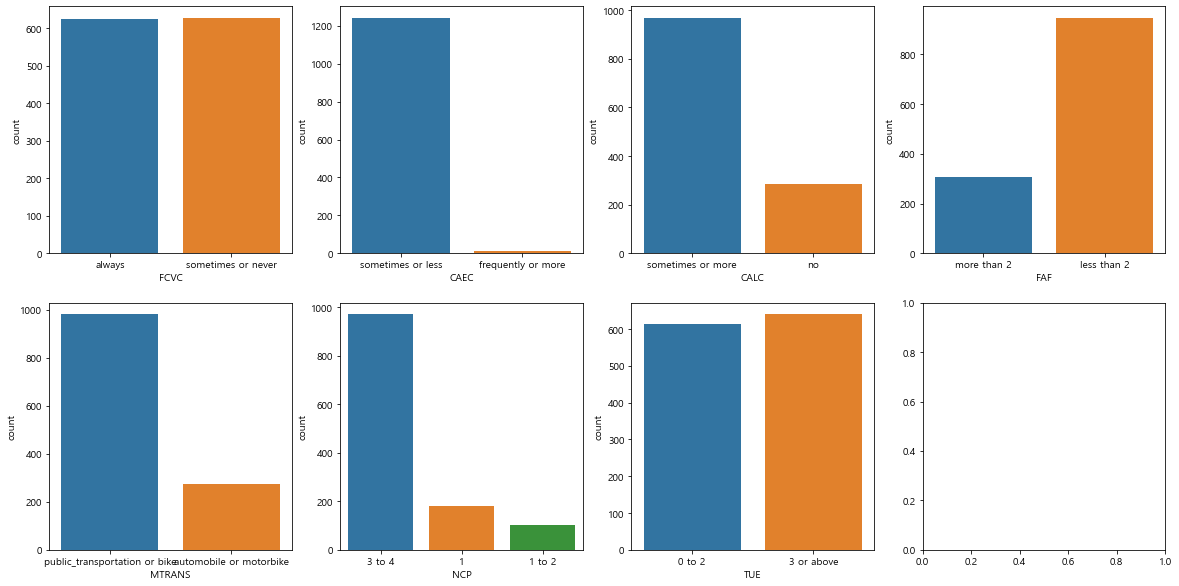

In [19]:
merge_target_col = ['FCVC', 'CAEC', 'CALC', 'FAF', 'MTRANS', 'NCP', 'TUE']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, col in enumerate(merge_target_col):
    ax_col = i%4
    ax_row = i//4
    sns.countplot(x=col, data=obesity, ax=axes[ax_row, ax_col])

- 그리고 Encoding을 수행한다. 본 데이터의 경우 다수 카테고리가 존재하는 경우 순서의 의미가 있기 때문에, LabelEncoding을 사용해도 무방하다고 판단하였다.
- Encoding 진행하여 모든 변수가 숫자로 변경되었음을 확인하였으며, 이후 필요할 수도 있는 역변환 함수도 같이 구현하였다.

In [20]:
encoder_dict = dict()
for col in cat_col:
    encoder = LabelEncoder()
    encoder_dict[col] = encoder # encoder 저장 (inverse를 위함)
    
    obesity.loc[:, col] = encoder.fit_transform(obesity.loc[:, col])

In [21]:
# target 변수 encoding
encoder = LabelEncoder()
encoder_dict[target_col] = encoder
obesity.loc[:, target_col] = encoder.fit_transform(obesity.loc[:, target_col])

In [22]:
obesity.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,4,1,27,1.80,87,0,0,0,2,1,0,0,0,1,0,1,1,3,26.851852
1,11,1,26,1.85,105,1,1,0,2,1,0,2,0,1,1,1,1,0,30.679328
2,14,1,41,1.80,99,0,1,1,2,1,0,0,0,1,1,1,0,0,30.555556


In [23]:
# 역 인코딩용 함수
def inverse_transform(col):
    return encoder_dict[col].inverse_transform(obesity[col])

### 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라
- 본 시험에서는 변수들의 카테고리를 합치는 과정을 파생 변수 생성이라고 생각하고 풀이하였으나 사실 이 과정은 전처리라고 보는 게 맞습니다. 감점이 있었을 것으로 추측되며, 이번에는 정답이라고 생각되는 방법으로 답안 작성하였습니다.
- 술과 담배는 인체에 좋지 않은 영향을 주는 습관으로, 이를 함께할 경우 비만에 더 큰 영향을 줄 것으로 생각된다. 이에 CALC와 SMOKE 변수를 조합하여, 안함/술/담/술&담배 카테고리를 갖는 CALC_SMOKE 변수를 생성하였다.
- 생성된 파생변수는 범주형 변수이므로, 다른 범주형 변수와 마찬가지로 인코딩을 수행한다.

In [24]:
obesity['CALC_SMOKE'] = np.where((inverse_transform('SMOKE')=='yes') & (inverse_transform('CALC')=='sometimes or more'), 'calc and smoke', 
                                 np.where(inverse_transform('SMOKE')=='yes', 'smoke', np.where(inverse_transform('CALC')=='sometimes or more', 'calc', 'no')))

- 파생 생성된 CALC_SMOKE 데이터의 분포는 다음과 같다.

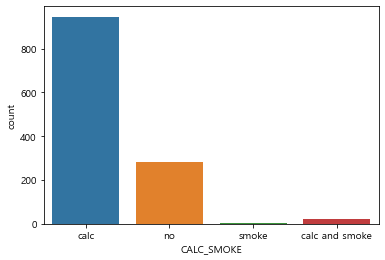

In [25]:
sns.countplot(obesity['CALC_SMOKE'])
plt.show()

In [26]:
cat_col.append('CALC_SMOKE') # 파생 변수 카테고리 변수 리스트에 추가

In [27]:
# 파생변수 encoding
encoder = LabelEncoder()
encoder_dict['CALC_SMOKE'] = encoder
obesity.loc[:, 'CALC_SMOKE'] = encoder.fit_transform(obesity.loc[:, 'CALC_SMOKE'])

- 그리고 1-2 문제에서 앞서 서술한 수치형 변수 변환을 수행한다.
- 변환은 모든 수치형 변수 (Age, Height, Weight, BMI)에 적용하였다. 단, 일부 변수에 이상치가 존재하므로 이상치의 영향을 최소화하기 위해 RobustScaler를 사용하였다.
- 또한 scaling은 학습 데이터에만 적용되어야 하므로 적용하기 전 먼저 데이터 분할을 진행하였으며, 수치형 변수들에 대하여만 scaling 과정을 거친 다음 train/test 데이터에 적용하였다. 

In [28]:
x = obesity.loc[:, cat_col + num_col]
y = obesity[target_col]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [29]:
scaler = RobustScaler()

num_col_train_scaled = pd.DataFrame(scaler.fit_transform(x_train.loc[:, num_col]), columns=num_col)
num_col_test_scaled = pd.DataFrame(scaler.transform(x_test.loc[:, num_col]), columns=num_col)

In [30]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

for col in num_col:
    x_train.loc[:, col] = num_col_train_scaled.loc[:, col]
    x_test.loc[:, col] = num_col_test_scaled.loc[:, col]

### 2-1. 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라
- 시험장에서는 성능이 60%대가 나왔던 것으로 기억하는데, 지금은 너무 높게 나와서 오히려 당황스럽네요.. 그리드 서치나 보팅의 결과도 시험장에서 비교했던 결과와 약간 다르게 도출됩니다. 모델 성능 예측하는 함수 만들라고 했던 기억도 있습니다.
- 분류 모델로 LogisticRegression, Decision Tree, Neural Network를 선정하였다.
- 구축이 쉽고 해석이 용이한 모델로 LogisticRegression과 Decision Tree를, 성능을 취하는 모델로 NN을 선정하였다.
- 각 알고리즘에 대하여, 기본 파라미터를 가지고 모델을 생성하였다.
- 모델 수행 결과, Neural Network와 Decision Tree의 정확도 0.992, Logisitc Regression의 정확도 0.988으로 Logistic 모델의 정확도가 악갼 낮게 도출되었고, F1-score도 비슷한 양상을 보였다.

In [31]:
# 시험장 버전의 Logistic Regression은 기본 파라미터 사용 시 에러가 발생하므로 버전 업 필요
# 버전 업 후 커널 재시작
# !pip install scikit-learn==0.24.1

In [32]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
nn = MLPClassifier()

lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
nn.fit(x_train, y_train)

MLPClassifier()

In [33]:
lr_pred = lr.predict(x_test)
dt_pred = dt.predict(x_test)
nn_pred = nn.predict(x_test)

print(f'Logistic Regression 예측 정확도: {round(accuracy_score(y_test, lr_pred), 4)}')
print(f'Decision Tree 예측 정확도: {round(accuracy_score(y_test, dt_pred), 4)}')
print(f'Neural Network 예측 정확도: {round(accuracy_score(y_test, nn_pred), 4)}')
print('')
print(f'Logistic Regression F1-Score: {round(f1_score(y_test, lr_pred, average="weighted"), 4)}')
print(f'Decision Tree F1-Score: {round(f1_score(y_test, dt_pred, average="weighted"), 4)}')
print(f'Neural Network F1-Score: {round(f1_score(y_test, nn_pred, average="weighted"), 4)}')

Logistic Regression 예측 정확도: 0.988
Decision Tree 예측 정확도: 0.992
Neural Network 예측 정확도: 0.992

Logistic Regression F1-Score: 0.9881
Decision Tree F1-Score: 0.992
Neural Network F1-Score: 0.992


### 2-2. 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)
- 앞선 모델링에서 높은 성능을 보였던 모델 중 하나인 Neural Network를 가지고 Grid Search를 진행하였다.
- 대상 파라미터는 activation 함수와 초기 learning rate로 설정하였으며, scoring 기준은 precision, recall과 관련있는 f1-score로 하였다.
- best parameter는 relu activation에 learning rate 0.005가 선정되었고, 해당 모델의 precision과 recall은 0.9961과 0.996으로 기존 모델보다 높다.

In [34]:
parameters = {'activation': ['relu', 'tanh'], 'learning_rate_init': [0.0005, 0.001, 0.005, 0.01]}

grid_clf = GridSearchCV(MLPClassifier(), param_grid=parameters, scoring='f1_weighted', cv=5)
grid_clf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_clf.best_params_)
print('GridSearchCV 최고 F1: {0:.4f}'.format(grid_clf.best_score_))
best_clf = grid_clf.best_estimator_

GridSearchCV 최적 하이퍼 파라미터: {'activation': 'relu', 'learning_rate_init': 0.005}
GridSearchCV 최고 F1: 0.9880


In [35]:
best_pred = best_clf.predict(x_test)

print(f'Precision: {round(precision_score(y_test, best_pred, average="weighted"), 4)}')
print(f'Recall: {round(recall_score(y_test, best_pred, average="weighted"), 4)}')

Precision: 0.9961
Recall: 0.996


### 2-3. 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라
- 2-1의 3가지 모델인 Logistic Regression, Decision Tree, Neural Network 세 가지 모델에 대하여, Soft Voting을 이용한 모델을 생성하였다.
- 모델 예측 결과, precision과 recall 모두 2-2의 그리드 서치 결과와 동일한 결과를 보였다.

In [36]:
voting = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('nn', nn)], voting='soft')
voting.fit(x_train, y_train)

voting_pred = voting.predict(x_test)

print(f'Precision: {round(precision_score(y_test, voting_pred, average="weighted"), 4)}')
print(f'Recall: {round(recall_score(y_test, voting_pred, average="weighted"), 4)}')

Precision: 0.9961
Recall: 0.996


### 3. 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

- 실제 시험장에서는 일반적인 변수 중요도(또는 회귀 계수)를 가지고 풀이하여 감점이 있었지만, 여기에는 정답이라고 생각하는 풀이를 적었습니다.
- Drop Column Importance 방식은 각 변수를 하나씩 제거한 모델과 전체 모델의 결과를 비교하는 방식으로 변수 중요도를 계산하며, 원리 이해와 해석이 상대적으로 쉬운 편이다.
- 여기에서는 Soft Voting 모델을 바탕으로 변수 중요도를 확인해 보았다.
- 변수 중요도를 계산해 본 결과 Gender, SCC, TUE, CALC_SMOKE, Age, Weight 변수가 상대적으로 중요한 것으로 도출되었다.

In [37]:
reduced_recall_dict = dict()
for col in x_train.columns:
    reduced_x_train = x_train.drop(col, axis=1)
    reduced_x_test = x_test.drop(col, axis=1)
    
    reduced_model = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('nn', nn)], voting='soft')
    reduced_model.fit(reduced_x_train, y_train)
    reduced_pred = reduced_model.predict(reduced_x_test)
    reduced_recall_dict[col] = recall_score(y_test, voting_pred, average="weighted") - recall_score(y_test, reduced_pred, average="weighted")
    
    print(f'[{col}] Feature Importance: {round(reduced_recall_dict[col], 4)}')

[CAEC] Feature Importance: 0.0
[CALC] Feature Importance: 0.0
[CH2O] Feature Importance: 0.0
[FAF] Feature Importance: 0.0
[FAVC] Feature Importance: 0.0
[FCVC] Feature Importance: 0.0
[Gender] Feature Importance: 0.004
[MTRANS] Feature Importance: 0.0
[NCP] Feature Importance: 0.0
[SCC] Feature Importance: 0.004
[SMOKE] Feature Importance: 0.0
[TUE] Feature Importance: 0.004
[family_history_with_overweight] Feature Importance: 0.0
[CALC_SMOKE] Feature Importance: 0.004
[Age] Feature Importance: 0.004
[Height] Feature Importance: 0.0
[Weight] Feature Importance: 0.004
[BMI] Feature Importance: 0.0


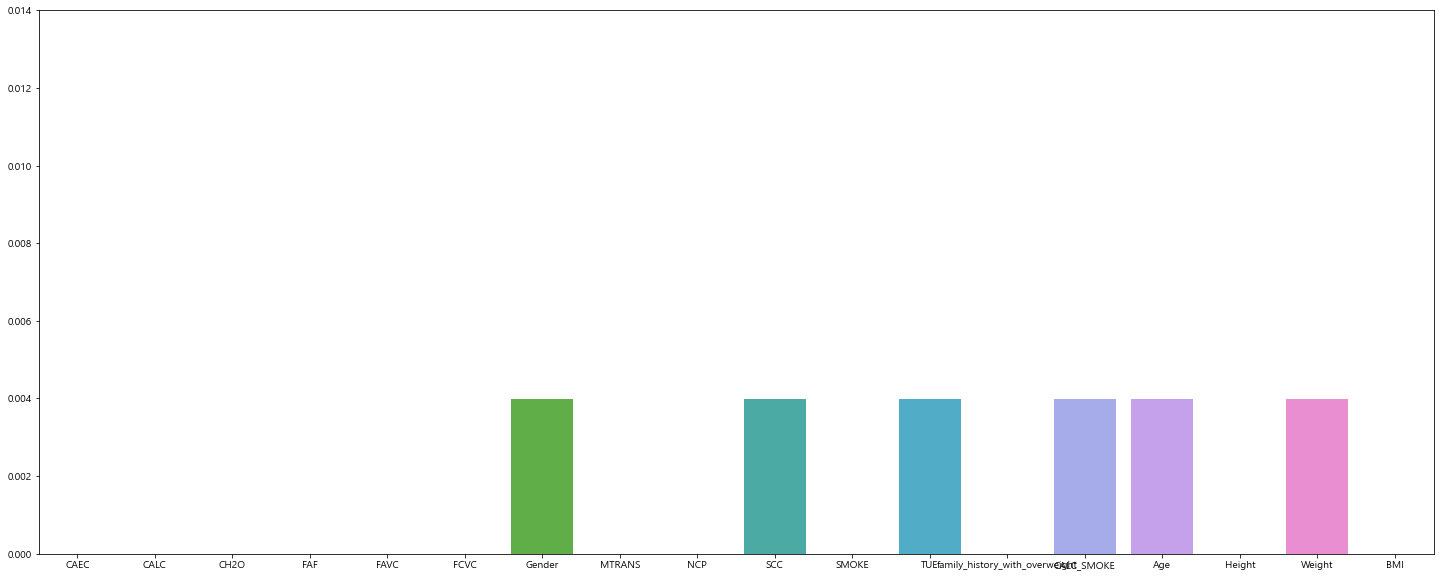

In [38]:
plt.figure(figsize=(25, 10))
sns.barplot(list(reduced_recall_dict.keys()), list(reduced_recall_dict.values()))
plt.ylim([0, 0.014])
plt.show()

## 4. 학생 건강검진 분석
- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

In [39]:
bmi = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv")
bmi

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성
...,...,...,...,...,...,...,...,...,...,...,...
6796,ID_6443,156.04,55.36,20030429,2020_04_23,1,4,1,7.8,9.3,여성
6797,ID_3606,182.46,67.55,20050528,2022_08_03,1,4,0,2.9,8.9,남성
6798,ID_5704,150.18,48.29,20030420,2020_02_29,0,1,1,6.0,7.8,여성
6799,ID_6637,159.45,60.53,20000718,2016_12_11,0,1,1,7.6,5.4,여성


### 4-1. 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 BMI를 5단위로 구분하여 와 적정 체중여부에 대한 빈도 표를 만들어라
 
> bmi 계산
    - Bmi = 몸무게(kg)/(키(m)**2)   

> 만나이 구하기
    - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
    - 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


> 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)     
    17세 남자 : 21.03이상 23.21 미만   
    17세 여자 : 20.03이상 22.39 미만    
    16세 남자 : 21.18이상 23.45 미만   
    16세 여자 : 19.61이상 21.74 미만       

- 먼저, 생년월일과 건강검진일 컬럼의 데이터 타입을 확인한다. 각각 int64와 object 타입으로 확인되므로, 처리를 위해 datetime 형식으로 변경해 준다.
- 처리 결과 특별한 이슈 없이 변경됨을 확인할 수 있다.

In [40]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6801 entries, 0 to 6800
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       6801 non-null   object 
 1   키        6801 non-null   float64
 2   weight   6801 non-null   float64
 3   생년월일     6801 non-null   int64  
 4   건강검진일    6801 non-null   object 
 5   공학여부     6801 non-null   int64  
 6   채소섭취정도   6801 non-null   int64  
 7   아침식사여부   6801 non-null   int64  
 8   일주일운동시간  6801 non-null   float64
 9   수면시간     6801 non-null   float64
 10  성별       6801 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 584.6+ KB


In [41]:
bmi.건강검진일 = pd.to_datetime(bmi.건강검진일, format='%Y_%m_%d')
bmi.건강검진일

0      2020-11-15
1      2014-11-20
2      2020-01-28
3      2018-09-27
4      2015-03-03
          ...    
6796   2020-04-23
6797   2022-08-03
6798   2020-02-29
6799   2016-12-11
6800   2019-02-01
Name: 건강검진일, Length: 6801, dtype: datetime64[ns]

In [42]:
bmi.생년월일 = pd.to_datetime(bmi.생년월일, format='%Y%m%d')
bmi.생년월일

0      2004-10-03
1      1997-07-25
2      2002-09-21
3      2002-01-06
4      1998-07-08
          ...    
6796   2003-04-29
6797   2005-05-28
6798   2003-04-20
6799   2000-07-18
6800   2001-06-04
Name: 생년월일, Length: 6801, dtype: datetime64[ns]

- 그 다음, 두 변수의 차이를 구한다.
- 건강검진일에서 생년월일을 빼면 timedelta 형식으로 반환되는데, 날짜 차이를 string 형태로 반환한 데이터를 1년 기준인 365로 나누어 만 나이를 계산한다.
- 학생들의 만 나이는 16세 또는 17세로 판단된다.

In [43]:
bmi['만나이'] = (bmi.건강검진일 - bmi.생년월일).astype(str).str.split(' ').str[0].astype(int)//365
bmi['만나이']

0       16
1       17
2       17
3       16
4       16
        ..
6796    16
6797    17
6798    16
6799    16
6800    17
Name: 만나이, Length: 6801, dtype: int64

In [44]:
bmi['만나이'].value_counts()

17    3686
16    3115
Name: 만나이, dtype: int64

- bmi 산식으로 bmi 지수를 계산한다. 키의 경우 m가 단위인데 실제 데이터는 cm로 되어 있으므로 100으로 나누어 m로 변환해야 한다.

In [45]:
bmi['bmi'] = bmi.weight/((bmi.키/100)**2)
bmi['bmi']

0       22.920154
1       21.027214
2       25.156852
3       23.669733
4       21.368469
          ...    
6796    22.736531
6797    20.290372
6798    21.410805
6799    23.807929
6800    22.868573
Name: bmi, Length: 6801, dtype: float64

- 마지막으로 적정 체중 여부를 계산한다. 적정 체중의 경우 만 나이와 성별에 따라 bmi 수치의 기준이 다르므로, 이 변수를 기준으로 데이터를 분리한 다음 각각 계산해 준다.
- 만 나이, 성별 각각 두 가지 케이스가 존재하므로, 나누어지는 데이터의 군집 개수는 4개이다.
- 적정체중여부를 계산한 다음에는 다시 테이블를 하나로 만든다.
- 적정체중여부 변수의 빈도를 살펴보면, 적정 체중인 학생이 3,993명, 그렇지 않은 학생이 2,808명으로 적정 체중인 학생의 비율이 더 높은 것으로 나타났다.

In [46]:
groups = bmi.groupby(['만나이', '성별'])
m_16 = groups.get_group((16, '남성'))
f_16 = groups.get_group((16, '여성'))
m_17 = groups.get_group((17, '남성'))
f_17 = groups.get_group((17, '여성'))

m_16['적정체중여부'] = np.where(m_16['bmi'] < 21.18, 0, np.where(m_16['bmi'] >= 23.45, 0, 1))
f_16['적정체중여부'] = np.where(f_16['bmi'] < 19.61, 0, np.where(f_16['bmi'] >= 21.74, 0, 1))
m_17['적정체중여부'] = np.where(m_17['bmi'] < 21.03, 0, np.where(m_17['bmi'] >= 23.21, 0, 1))
f_17['적정체중여부'] = np.where(f_17['bmi'] < 20.03, 0, np.where(f_17['bmi'] >= 22.39, 0, 1))

cal_bmi = pd.concat([m_16, f_16, m_17, f_17], axis=0, ignore_index=True)
cal_bmi

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,만나이,bmi,적정체중여부
0,ID_4135,169.01,65.47,2004-10-03,2020-11-15,1,2,1,4.4,8.3,남성,16,22.920154,1
1,ID_4785,162.21,62.28,2002-01-06,2018-09-27,1,4,0,5.1,6.8,남성,16,23.669733,0
2,ID_4140,157.00,55.12,1998-08-15,2015-03-27,1,3,1,4.9,8.9,남성,16,22.361962,1
3,ID_4350,170.59,67.50,2000-11-26,2017-07-07,1,3,1,6.4,9.9,남성,16,23.195121,1
4,ID_4111,164.34,61.55,2006-11-11,2022-12-20,0,3,1,8.8,5.7,남성,16,22.789851,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6796,ID_1349,162.77,51.35,1999-10-09,2017-01-25,1,4,0,6.4,8.4,여성,17,19.381693,0
6797,ID_255,166.43,59.08,2000-10-28,2018-01-04,0,0,1,4.6,8.3,여성,17,21.329332,1
6798,ID_124,149.18,47.56,2004-10-08,2022-08-04,1,0,1,8.3,7.6,여성,17,21.370793,1
6799,ID_433,169.14,57.81,2000-09-15,2018-07-05,0,4,0,0.0,6.0,여성,17,20.207394,1


In [47]:
cal_bmi.적정체중여부.value_counts()

1    3993
0    2808
Name: 적정체중여부, dtype: int64

### 4-2. 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

- 본 시험에서는 아래와 같이 각 변수 하나와 종속변수의 독립성을 판단하는 것으로 풀이하였으나, 독립변수 간 상관성을 고려하면 전체 독립변수를 한번에 로지스틱 회귀 돌리는 방법이 좀 더 적합하지 않을까 하는 생각이 듭니다. 이 경우 공학여부, 수면시간 두 변수를 유의한 변수로 판단하게 됩니다.
- 먼저 독립변수의 데이터 형태를 살펴보면, 공학여부, 아침식사여부, 채소섭취정도, 성별 변수는 범주형 변수이고 일주일운동시간과 수면시간은 수치형 변수이다. 그리고 종속변수인 적정체중여부는 이진 범주형 변수이다.
- 따라서 공학여부, 아침식사여부, 채소섭취정도, 성별 변수는 카이제곱 독립성검정을 실시하고, 일주일운동시간과 수면시간 변수는 단순 로지스틱 회귀를 적용하여 각 독립변수와 적정체중여부 변수의 독립성을 판단한다.
- H0: 독립변수와 적정체중여부는 관계가 없다.
- H1: 독립변수와 적정체중여부는 관계가 있다.

- 유의수준 0.05하에서 검정을 실시하였다. 그 결과, p-value가 0.05를 넘는 아침식사여부와 일주일운동시간, 성별 변수는 적정체중여부와 독립인 것으로 볼 수 있었다.
- 반대로 p-value가 0.05보다 작은 공학여부, 채소섭취정도와 수면시간은 적정체중여부와 상관관계가 있는 변수로 판단된다.

In [48]:
cat_list = ['공학여부', '아침식사여부', '채소섭취정도', '성별']
num_list = ['일주일운동시간', '수면시간']

for cat_var in cat_list:
    table = pd.crosstab(cal_bmi[cat_var], cal_bmi['적정체중여부'])
    chi, p, df, expect = stats.chi2_contingency(table) 
    print(f'독립변수: {cat_var}')
    print('Statistic:', chi)
    print('p-value:', p)
    print('')
    
for num_var in num_list:
    mod_glm = smf.glm(formula = f"적정체중여부 ~ {num_var}", data=cal_bmi, family=sm.families.Binomial()).fit()
    print(f'독립변수: {num_var}')
    print(mod_glm.summary())
    print('')

독립변수: 공학여부
Statistic: 4.54236778900767
p-value: 0.03306582384935249

독립변수: 아침식사여부
Statistic: 0.15215088093453705
p-value: 0.6964883154464439

독립변수: 채소섭취정도
Statistic: 10.14319401986083
p-value: 0.03808345509538242

독립변수: 성별
Statistic: 0.002344801636681143
p-value: 0.9613790084238675

독립변수: 일주일운동시간
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 적정체중여부   No. Observations:                 6801
Model:                            GLM   Df Residuals:                     6799
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4610.2
Date:                Sun, 25 Feb 2024   Deviance:                       9220.4
Time:                        01:09:20   Pearson chi2:                 6.80e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          4

### 4-3. 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
> 로지스틱회귀 모델은 오즈비를 구하라
> xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

- 앞선 검정에서 유의한 변수로 판단되었던 공학여부, 채소섭취정도, 수면시간을 독립변수로 하여 적정 체중 여부를 예측하는 모델을 구현하였다. 모델 기법으로는 로지스틱 회귀분석과 XGBoost를 사용하였다.
- 모델의 성능을 평가하기 위해 8:2로 train/valid 데이터셋 분리를 진행하되, 적정체중여부 변수가 고르게 분포되게 하였다. 그리고 standard scaling을 진행하여 독립변수의 scale이 영향을 미치지 않도록 조치하였다.
- 또한, 각 모델의 하이퍼파리미터는 default 값을 사용하였다.

In [49]:
x = cal_bmi.loc[:, ['공학여부', '채소섭취정도', '수면시간']]
y = cal_bmi['적정체중여부']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
lr = LogisticRegression()
xgb = XGBClassifier()

lr.fit(x_train_scaled, y_train)
xgb.fit(x_train_scaled, y_train)

XGBClassifier()

- Accuracy와 F1-Score를 기준으로 모델을 평가하였다.
- Accuracy의 경우 Logisitc Regression 모델이 약 58.7%의 정확도를 보여 약간 더 좋았으며, F1-Score도 Logistic Regression이 0.74로 더 좋게 나타났다.

In [51]:
lr_pred = lr.predict(x_test_scaled)
xgb_pred = xgb.predict(x_test_scaled)

print(f'Logistic Regression 예측 정확도: {round(accuracy_score(y_test, lr_pred), 4)}')
print(f'XGBoost 예측 정확도: {round(accuracy_score(y_test, xgb_pred), 4)}')
print('')
print(f'Logistic Regression F1-Score: {round(f1_score(y_test, lr_pred), 4)}')
print(f'XGBoost F1-Score: {round(f1_score(y_test, xgb_pred), 4)}')

Logistic Regression 예측 정확도: 0.5871
XGBoost 예측 정확도: 0.5849

Logistic Regression F1-Score: 0.7398
XGBoost F1-Score: 0.7293


- 그리고 각 모델의 변수 중요도를 파악하였다. 두 모델 모두 공학여부를 적정체중여부 변수 예측에 가장 중요한 변수로 선택하였고, 그 다음은 수면시간과 채소섭취정도 순서였다.

Class 0 coef:[0.067 0.007 0.055]
공학여부 : 0.067
채소섭취정도 : 0.007
수면시간 : 0.055


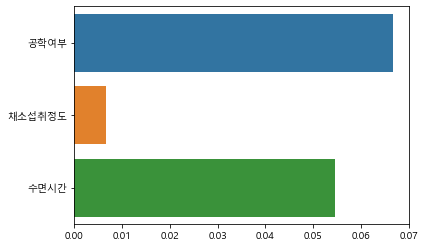

In [52]:
### Logistic Regression feature importance
print("Class 0 coef:{0}".format(np.round(lr.coef_, 3)[0]))
for name, value in zip(x.columns, lr.coef_[0]):
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=abs(lr.coef_[0]), y=pd.DataFrame(x).columns)
plt.show()

Class 0 coef:[0.308 0.394 0.298]
공학여부 : 0.308
채소섭취정도 : 0.394
수면시간 : 0.298


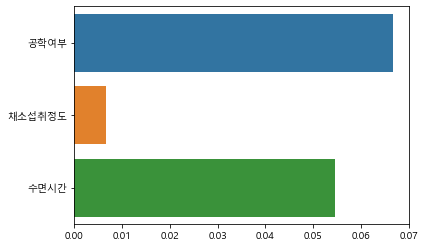

In [53]:
### XGBoost feature importance
print("Class 0 coef:{0}".format(np.round(xgb.feature_importances_, 3)))
for name, value in zip(x.columns, xgb.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=abs(lr.coef_[0]), y=pd.DataFrame(x).columns)
plt.show()

### 4-4. 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

- Logistic Regression과 XGBoost의 ROC-AUC 그래프를 그리면 다음과 같다. AUC score는 오히려 XGBoost 모델이 소폭 더 높다.

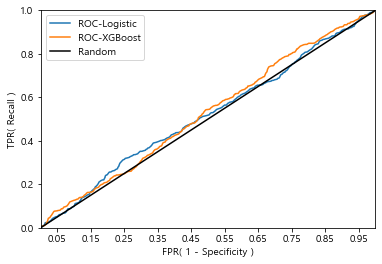

In [54]:
fprs_lr, tprs_lr, thresholds = roc_curve(y_test, lr.predict_proba(x_test_scaled)[:, 1])
fprs_xgb, tprs_xgb, thresholds = roc_curve(y_test, xgb.predict_proba(x_test_scaled)[:, 1])

sns.lineplot(x=fprs_lr, y=tprs_lr, ci=False, label='ROC-Logistic')
sns.lineplot(x=fprs_xgb, y=tprs_xgb, ci=False, label='ROC-XGBoost')
sns.lineplot(x=[0, 1], y=[0, 1], color='black', linestyle='dashed', label='Random')
      
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)
plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

In [55]:
print(f"AUC score of Logistic Regression: {round(roc_auc_score(y_test, lr.predict_proba(x_test_scaled)[:, 1]), 3)}")
print(f"AUC score of XGBoost: {round(roc_auc_score(y_test, xgb.predict_proba(x_test_scaled)[:, 1]), 3)}")

AUC score of Logistic Regression: 0.518
AUC score of XGBoost: 0.526


# 통계 (40점)

## 5. 무게가 N($\theta$, 100)인 정규분포에서, 사전분포는 N(100, 256)이다. 무게가 120kg인 제품이 있을 때, 사후분포의 평균을 구하라 (5점)
- 실제 시험장에서는 풀이하지 못했던 답안입니다.
- $\theta$를 샘플링된 제품의 무게인 120으로 가정하며, n=1로 두고 사후분포를 계산한다.
- 추정된 사후분포 평균값은 114.38이다.

In [56]:
mu_b, sigma2_b = 100, 256 # 사전확률분포 모수
mu, sigma2 = 120, 100 # theta를 120으로 가정

round(sigma2/(sigma2_b + sigma2) * mu_b + (sigma2_b)/(sigma2_b + sigma2) * mu, 2)

114.38

## 6. 매체별 광고 효과 (15점)
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
- 종속변수 : Sales

In [57]:
sales = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv")
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### 6-1. 회귀 모델링 후 유의하지 않는변수 파악
- 각 광고 매체를 독립변수로, Sales 변수를 종속변수로 하는 선형 회귀 모델을 확인하였다. 먼저, F-통계량의 p-value가 매우 작은 값이므로 해당 모델은 통계적으로 유의하다.
- 변수 별 유의도를 검정하는 T-통계량들을 살펴보면, Newspaper 변수의 p-value가 0.95로 유의수준 0.05를 상회하여 유의하지 않은 것으로 판단된다.

In [58]:
model = smf.ols(formula="Sales ~ TV + Radio + Newspaper", data=sales)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           8.13e-99
Time:                        01:09:22   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6-2. 변수 선택시 먼저 제거 될 변수 및 근거 제시
- 변수선택은 유의하지 않은 변수를 제거하고 적은 변수로 최적화된 성능을 얻는 것이 목적이므로, 앞선 회귀분석에서 유의하지 않은 변수였던 Newspaper가 우선적으로 제거될 가능성이 높다.
- 이후 그 다음으로 유의하지 않은 변수를 제거해야 한다면, 유의한 변수 중 T-통계량 값이 가장 낮은 Radio 변수가 그 대상이 될 수 있다.

### 6-3. 유의하지 않은 변수를 제거한 다음, VIF를 통한 다중공선성 진단
- 유의하지 않은 변수인 Newspaper는 제거하고, 선형 회귀 모델을 구성하였다. 그 결과 F-통계량의 p-value가 매우 작은 유효한 모델이 도출되었고, 변수 별 유의도 역시 p-value 0.00으로 유의하다.
- 따라서, 모델에서 유의한 변수였던 TV와 Radio 변수에 대하여 다중공선성을 판단하였으며, 두 변수의 VIF 값은 1.00으로 10 미만이므로 다중공선성은 없다고 볼 수 있다.

In [59]:
model = smf.ols(formula="Sales ~ TV + Radio", data=sales)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          2.39e-100
Time:                        01:09:22   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
### VIF 계산
y, x = dmatrices("Sales ~ TV + Radio", data=sales, return_type="dataframe")

vif_list = []
for i in range(1, len(x.columns)): 
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,1.003013,TV
1,1.003013,Radio


## 7. 계약 여부 비교 (10점)  
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [61]:
contract = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv", index_col='Unnamed: 0')
contract

,A,B,C,D,E
contract_1,1,0,1,1,1
contract_2,0,1,0,1,0
contract_3,1,0,0,0,0
contract_4,0,1,1,1,1
contract_5,0,1,0,1,0
contract_6,1,1,0,1,1
contract_7,0,1,1,0,0
contract_8,0,1,0,0,0
contract_9,1,0,0,1,1
contract_10,1,1,0,0,0


### 7-1. 가설 설정
- 이진 변수인 계약 유무에 대하여, 영업사원의 수가 3명 이상이고 각 계약별로 대응되어있는 형태이므로 Cochran's Q 검정을 이용한다.
- H0: 영업사원 별 계약 성사 비율은 차이가 없다.
- H1: 영업사원 별 계약 성사 비율은 차이가 있다.

### 7-2. 검정 결과 제시
- Cochran's Q 검정 결과 검정 통계량 4.52, p-value 0.34로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다.
- 따라서 영업사원 별 계약 성사 비율에는 차이가 있다고 볼 통계적 근거가 부족하다.

In [62]:
print(cochrans_q(contract))

df          4
pvalue      0.3406392758219471
statistic   4.516129032258065


## 8. 유기견이 하루에 2.2마리 발생한다 (10점)
- 시험문제는 일주일에 2.2마리라고 주어졌던 것으로 기억하고 있지만, 소문제들도 모두 일주일을 기준으로 답을 적게 해서 기간이 중요한 것은 아니었긴 합니다.
- 일주일동안 발생하는 유기견 수는 평균이 2.2인 포아송분포를 따른다.

### 8-1. 한 마리도 안 버려질 확률
- 한 마리도 안 버려질 확률은 0.11이다.

In [63]:
round(stats.poisson.pmf(k=0, mu=2.2), 2)

0.11

### 8-2. 적어도 2마리 버려질 확률
- 적어도 2마리 버려질 확율은 0.65이다.

In [64]:
round(1 - stats.poisson.cdf(k=1, mu=2.2), 2)

0.65

끝. 14페이지